## Question:  
I decided to target the following 27 week time period to perform my EDA on: 2020-07-25 to 2021-01-29. I was interested in this time period because I wanted to find insights on how the MTA traffic pattern changes as we move out of summer (August) and into the new school year (September), onto the holiday season in December, and into the new year. One would expect the traffic to increase in September. The government fiscal year started on October 1st. Public holidays celebrated in NY include:  
  
Labor Day 	Mon, Sep 7, 2020  
Columbus Day 	Mon, Oct 12, 2020  
Veterans Day 	Wed, Nov 11, 2020  
Thanksgiving 	Thu, Nov 26, 2020  
Christmas Day 	Fri, Dec 25, 2020  
New Year's Day 	Fri, Jan 1, 2021  
Martin Luther King Jr. Day 	Mon, Jan 18, 2021  

## Importing MTA data from website into a .db file for SQL queries

I used the 'get_mta.py' file provided and imported data from the mta website ('http://web.mta.info/developers/turnstile.html') following the the instructions on the 'get_mta.md' readme file.  
  
The resulting .db file was saved in the 'data' folder as 'mta_data - 27 weeks - 2020.08.01 to 2021.01.30.db'
  
The following command was used to get the data for the months of August, 2020 to January, 2021:  
  
python 'get_mta.py' "(2008|2009|2010|2011|2012|2101)"

27 weeks to collect:

['2021-01-30', '2021-01-23', '2021-01-16', '2021-01-09', '2021-01-02', '2020-12-26', '2020-12-19', '2020-12-12', '2020-12-05', '2020-11-28', '2020-11-21', 
'2020-11-14', '2020-11-07', '2020-10-31', '2020-10-24', '2020-10-17', '2020-10-10', '2020-10-03', '2020-09-26', '2020-09-19', '2020-09-12', '2020-09-05', '2020-08-29', '2020-08-22', '2020-08-15', '2020-08-08', '2020-08-01']



## Using SQLAlchemy to import SQL query as a Pandas DataFrame

In [2]:
# if SQLAlchemy is not installed:
#!conda install -c anaconda sqlalchemy

In [3]:
from sqlalchemy import create_engine
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
engine = create_engine("sqlite:///mta_data.db") #telling it to use sqlite specifically
engine

Engine(sqlite:///mta_data.db)

In [5]:
all_tables = engine.table_names # attribute with list the table names in the database
all_tables

<bound method Engine.table_names of Engine(sqlite:///mta_data.db)>

In [6]:
engine.table_names()

<ipython-input-6-4c13db206af4>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names() # ??? there seems to be no name for the table.


['mta_data']

In [7]:
df = pd.read_sql('SELECT * FROM mta_data', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,03:00:00,REGULAR,7521371,2563177
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,07:00:00,REGULAR,7521374,2563190
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,11:00:00,REGULAR,7521399,2563231
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,15:00:00,REGULAR,7521490,2563274
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,19:00:00,REGULAR,7521630,2563312


In [8]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,03:00:00,REGULAR,7521371,2563177
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,07:00:00,REGULAR,7521374,2563190
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,11:00:00,REGULAR,7521399,2563231
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,15:00:00,REGULAR,7521490,2563274
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2021,19:00:00,REGULAR,7521630,2563312
...,...,...,...,...,...,...,...,...,...,...,...
5673225,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,12:59:32,REGULAR,5554,538
5673226,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,13:00:00,REGULAR,5554,538
5673227,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,13:11:06,REGULAR,5554,538
5673228,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,17:00:00,REGULAR,5554,538


In [9]:
df.shape

(5673230, 11)

## Field Descriptions from MTA website  
http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt  

Field Description

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device

## Data Cleaning

In [67]:
# strip white spaces for good measure
df.columns = [column.strip() for column in df.columns] # reassign column names for 
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673230 entries, 0 to 5673229
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 476.1+ MB


'DATE' and 'TIME' columnes are of type "object" which often means string

In [13]:
# let's take a look at the specific entry for row 0
df.iloc[0]['DATE'] # the quotes around the output implies that 'DATE' column is of type string
df.iloc[0]['TIME'] # same with 'TIME' column

'03:00:00'

### converting 'DATE' and 'TIME' columns into a DateTime object

In [14]:
df['DATE_TIME'] = df['DATE'] + ' ' + df['TIME'] # concatenate with a space seperator; Pandas can parse this format when converting to datetime
df['DATE_TIME'] # still a string

0          01/23/2021 03:00:00
1          01/23/2021 07:00:00
2          01/23/2021 11:00:00
3          01/23/2021 15:00:00
4          01/23/2021 19:00:00
                  ...         
5673225    07/31/2020 12:59:32
5673226    07/31/2020 13:00:00
5673227    07/31/2020 13:11:06
5673228    07/31/2020 17:00:00
5673229    07/31/2020 21:00:00
Name: DATE_TIME, Length: 5673230, dtype: object

In [15]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME']) # converts our new 'DATE_TIME' column into a datetime object

In [16]:
df.info() # dtype for 'DATE_TIME' column is now datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673230 entries, 0 to 5673229
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 519.4+ MB


### Check for Duplicate Entries
Each unique turnstile is represented by the same values for the following columns:  
'C/A'  
'UNIT'   
'SCP'   
'STATION'  
- Each combination of `C/A`, `UNIT`, `SCP`, and `STATION` represents a unique turnstile.
- For each turnstile, for a given day, there should be exactly 6 rows (1 for each time slot, i.e. datetime)
- For each turnstile, the `DATE_TIME` entries should not be duplicated.

In [17]:
# code modified from MTA 1 exercise
# verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(65) # looks like there are 61 duplicate entries

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
317647,A064,R311,00-03-01,BOWERY,2020-08-17 16:00:00,2
3946455,R162,R166,00-00-01,79 ST,2020-12-30 16:00:00,2
3946459,R162,R166,00-00-01,79 ST,2020-12-31 08:00:00,2
5505629,R627,R063,00-00-01,SUTTER AV-RUTLD,2020-09-08 00:00:00,2
921496,H009,R235,00-06-00,BEDFORD AV,2020-08-12 16:00:00,2
...,...,...,...,...,...,...
921690,H009,R235,00-06-01,BEDFORD AV,2020-08-13 04:00:00,2
3782111,R138,R293,00-00-04,34 ST-PENN STA,2020-09-14 02:00:00,1
3782113,R138,R293,00-00-04,34 ST-PENN STA,2020-09-14 10:00:00,1
3782119,R138,R293,00-00-04,34 ST-PENN STA,2020-09-15 10:00:00,1


It seems when there are duplicate entries, the later row has a higher, presumably more accurate count for 'ENTRIES' or 'EXITS', hence let's just keep the later row.

In [19]:
df.shape

(5673230, 12)

In [20]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df2 = df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=False, keep='last').copy()

In [21]:
df2.shape

(5673169, 12)

In [22]:
# did it drop the correct number of rows? yes
df.shape[0]-df2.shape[0] # 5673230 - 5673169 = 61 duplicates we observed above have been removed.

61

In [23]:
(df2
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5) # no more duplicates

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-07-25 00:00:00,1
3782110,R138,R293,00-00-04,34 ST-PENN STA,2020-09-13 22:00:00,1
3782118,R138,R293,00-00-04,34 ST-PENN STA,2020-09-15 06:00:00,1
3782117,R138,R293,00-00-04,34 ST-PENN STA,2020-09-15 02:00:00,1
3782116,R138,R293,00-00-04,34 ST-PENN STA,2020-09-14 22:00:00,1


In [24]:
df2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
208914,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,20:00:00,REGULAR,5554,544,2021-01-29 20:00:00
208913,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,16:00:00,REGULAR,5554,544,2021-01-29 16:00:00
208912,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,12:00:00,REGULAR,5554,544,2021-01-29 12:00:00
208911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,08:00:00,REGULAR,5554,544,2021-01-29 08:00:00
208910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/29/2021,04:00:00,REGULAR,5554,544,2021-01-29 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5466530,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/25/2020,16:00:00,REGULAR,7436681,2527962,2020-07-25 16:00:00
5466529,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/25/2020,12:00:00,REGULAR,7436611,2527942,2020-07-25 12:00:00
5466528,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/25/2020,08:00:00,REGULAR,7436581,2527907,2020-07-25 08:00:00
5466527,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/25/2020,04:00:00,REGULAR,7436572,2527900,2020-07-25 04:00:00


LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 

In [25]:
# Drop DATE and TIME columns since we have DATE_TIME
# let's keep DIVISION and DESC for now.
df2.drop(["DATE", "TIME"], axis=1, errors="ignore") # ignore errors

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATE_TIME
208914,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,544,2021-01-29 20:00:00
208913,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,544,2021-01-29 16:00:00
208912,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,544,2021-01-29 12:00:00
208911,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,544,2021-01-29 08:00:00
208910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,544,2021-01-29 04:00:00
...,...,...,...,...,...,...,...,...,...,...
5466530,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7436681,2527962,2020-07-25 16:00:00
5466529,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7436611,2527942,2020-07-25 12:00:00
5466528,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7436581,2527907,2020-07-25 08:00:00
5466527,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7436572,2527900,2020-07-25 04:00:00


In [26]:
# end of day entries and exits occur at 8pm 20:00(so really should be looking at the first entry of the next day (00:00), then sift the Dates over, but we'll say it's 8pm for now; but come back and fix if time permits

# There 6 entries for each turnstile+date; let's get a dataframe with only the last timestamp (8pm) of the day; dropping the first 5 entries for the day; this will represent a daily time series; not a 4-hour time series

df2_daily_cum = (df2
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        [['LINENAME','DESC','DIVISION','ENTRIES','EXITS']].first()).copy()
# because of the groupby, the time parameter of DATE_TIME is reduced to a string column called 'DATE'
# convert 'DATE' to timeseries data
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME']) 
df2_daily_cum['DATE'] = pd.to_datetime(df2_daily_cum['DATE'])
df2_daily_cum

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2021-01-01,NQR456W,REGULAR,BMT,7511647,2558865
1,A002,R051,02-00-00,59 ST,2021-01-02,NQR456W,REGULAR,BMT,7511996,2559007
2,A002,R051,02-00-00,59 ST,2021-01-03,NQR456W,REGULAR,BMT,7512214,2559091
3,A002,R051,02-00-00,59 ST,2021-01-04,NQR456W,REGULAR,BMT,7512754,2559328
4,A002,R051,02-00-00,59 ST,2021-01-05,NQR456W,REGULAR,BMT,7513300,2559580
...,...,...,...,...,...,...,...,...,...,...
937592,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-27,R,REGULAR,RIT,5554,541
937593,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-28,R,REGULAR,RIT,5554,541
937594,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-29,R,REGULAR,RIT,5554,541
937595,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-12-30,R,REGULAR,RIT,5554,541


In [27]:
df2_daily_cum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937597 entries, 0 to 937596
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       937597 non-null  object        
 1   UNIT      937597 non-null  object        
 2   SCP       937597 non-null  object        
 3   STATION   937597 non-null  object        
 4   DATE      937597 non-null  datetime64[ns]
 5   LINENAME  937597 non-null  object        
 6   DESC      937597 non-null  object        
 7   DIVISION  937597 non-null  object        
 8   ENTRIES   937597 non-null  int64         
 9   EXITS     937597 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 78.7+ MB


In [28]:
df2_daily_cum = df2_daily_cum.sort_values(by=['C/A','UNIT','SCP','STATION','DATE'], inplace=False)
df2_daily_cum

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS
29,A002,R051,02-00-00,59 ST,2020-07-25,NQR456W,REGULAR,BMT,7436825,2527978
30,A002,R051,02-00-00,59 ST,2020-07-26,NQR456W,REGULAR,BMT,7437017,2528039
31,A002,R051,02-00-00,59 ST,2020-07-27,NQR456W,REGULAR,BMT,7437415,2528246
32,A002,R051,02-00-00,59 ST,2020-07-28,NQR456W,REGULAR,BMT,7437885,2528454
33,A002,R051,02-00-00,59 ST,2020-07-29,NQR456W,REGULAR,BMT,7438353,2528654
...,...,...,...,...,...,...,...,...,...,...
937432,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-25,R,REGULAR,RIT,5554,544
937433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-26,R,REGULAR,RIT,5554,544
937434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-27,R,REGULAR,RIT,5554,544
937435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-28,R,REGULAR,RIT,5554,544


- as of now we only have the cummulative counter values for entries and exits
- let's get the daily counts

In [29]:
# find daily ENTRIES and EXITS ; right now these are cumulative values on the counters
# exits - previous exits = daily exit count ; likewise for entries

df2_daily_cum[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df2_daily_cum
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES", 'EXITS']
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-29-30d90ef6ed63>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_daily_cum[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (df2_daily_cum


In [30]:
df2_daily_cum

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
29,A002,R051,02-00-00,59 ST,2020-07-25,NQR456W,REGULAR,BMT,7436825,2527978,NaT,NaN,NaN
30,A002,R051,02-00-00,59 ST,2020-07-26,NQR456W,REGULAR,BMT,7437017,2528039,2020-07-25,7436825.0,2527978.0
31,A002,R051,02-00-00,59 ST,2020-07-27,NQR456W,REGULAR,BMT,7437415,2528246,2020-07-26,7437017.0,2528039.0
32,A002,R051,02-00-00,59 ST,2020-07-28,NQR456W,REGULAR,BMT,7437885,2528454,2020-07-27,7437415.0,2528246.0
33,A002,R051,02-00-00,59 ST,2020-07-29,NQR456W,REGULAR,BMT,7438353,2528654,2020-07-28,7437885.0,2528454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937432,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-25,R,REGULAR,RIT,5554,544,2021-01-24,5554.0,544.0
937433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-26,R,REGULAR,RIT,5554,544,2021-01-25,5554.0,544.0
937434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-27,R,REGULAR,RIT,5554,544,2021-01-26,5554.0,544.0
937435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-28,R,REGULAR,RIT,5554,544,2021-01-27,5554.0,544.0


In [31]:
# Drop the rows for the earliest date in the df
df2_daily_cum.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
df2_daily_cum

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
30,A002,R051,02-00-00,59 ST,2020-07-26,NQR456W,REGULAR,BMT,7437017,2528039,2020-07-25,7436825.0,2527978.0
31,A002,R051,02-00-00,59 ST,2020-07-27,NQR456W,REGULAR,BMT,7437415,2528246,2020-07-26,7437017.0,2528039.0
32,A002,R051,02-00-00,59 ST,2020-07-28,NQR456W,REGULAR,BMT,7437885,2528454,2020-07-27,7437415.0,2528246.0
33,A002,R051,02-00-00,59 ST,2020-07-29,NQR456W,REGULAR,BMT,7438353,2528654,2020-07-28,7437885.0,2528454.0
34,A002,R051,02-00-00,59 ST,2020-07-30,NQR456W,REGULAR,BMT,7438828,2528832,2020-07-29,7438353.0,2528654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937432,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-25,R,REGULAR,RIT,5554,544,2021-01-24,5554.0,544.0
937433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-26,R,REGULAR,RIT,5554,544,2021-01-25,5554.0,544.0
937434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-27,R,REGULAR,RIT,5554,544,2021-01-26,5554.0,544.0
937435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-28,R,REGULAR,RIT,5554,544,2021-01-27,5554.0,544.0


In [32]:
937597 - 932541 # The 1st date for each turnstile should have been dropped, therefore, there should be 5056 turnstiles

5056

In [33]:
# to make like easier, let's make a list of the columns that identifies a unique turnstile, we seem to be using it a lot.
turnstile_col_list = ['C/A','UNIT','SCP','STATION']

# how many unique turnstiles are there?
(df
 .groupby(turnstile_col_list)
 .count()) # note, we used df here: output: 5056 <-- correct
(df2_daily_cum
 .groupby(turnstile_col_list)
 .count()) # note, we used df here: output: 5029 <-- ??? why is it less?

DATE  LINENAME  DESC  DIVISION  ENTRIES  \
C/A   UNIT SCP      STATION                                                  
A002  R051 02-00-00 59 ST           188       188   188       188      188   
           02-00-01 59 ST           188       188   188       188      188   
           02-03-00 59 ST           188       188   188       188      188   
           02-03-01 59 ST           188       188   188       188      188   
           02-03-02 59 ST           188       188   188       188      188   
...                                 ...       ...   ...       ...      ...   
TRAM2 R469 00-00-01 RIT-ROOSEVELT   188       188   188       188      188   
           00-03-00 RIT-ROOSEVELT   188       188   188       188      188   
           00-03-01 RIT-ROOSEVELT   188       188   188       188      188   
           00-05-00 RIT-ROOSEVELT   188       188   188       188      188   
           00-05-01 RIT-ROOSEVELT   188       188   188       188      188   

                                   EXITS  PREV_DATE  PREV_ENTRIES  PREV_EXITS  
C/A   UNIT SCP      STATION                                                    
A002  R051 02-00-00 59 ST            188        188           188         188  
           02-00-01 59 ST            188        188           188         188  
           02-03-00 59 ST            188        188           188         188  
           02-03-01 59 ST            188        188           188         188  
           02-03-02 59 ST            188        188           188         188  
...                                  ...        ...           ...         ...  
TRAM2 R469 00-00-01 RIT-ROOSEVELT    188        188           188         188  
           00-03-00 RIT-ROOSEVELT    188        188           188         188  
           00-03-01 RIT-ROOSEVELT    188        188           188         188  
           00-05-00 RIT-ROOSEVELT    188        188           188         188  
           00-05-01 RIT-ROOSEVELT    188        188           188         188  

[5029 rows x 9 columns]

In [34]:
# How many stations are there?
(df
 .groupby('STATION').count()) # for df, output: 379
(df2_daily_cum
 .groupby('STATION').count()) # for df2_daily_cum, output:379


,C/A,UNIT,SCP,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
STATION,,,,,,,,,,,,
1 AV,4455,4455,4455,4455,4455,4455,4455,4455,4455,4455,4455,4455
103 ST,2816,2816,2816,2816,2816,2816,2816,2816,2816,2816,2816,2816
103 ST-CORONA,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692
104 ST,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692
110 ST,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128
...,...,...,...,...,...,...,...,...,...,...,...,...
WOODLAWN,940,940,940,940,940,940,940,940,940,940,940,940
WORLD TRADE CTR,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360
WTC-CORTLANDT,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580


### list of things to check when time permits  
- are the station names unique?


## fixing reverse entries  
- for a given day, for a given turnstile, PREV_ENTRIES should always be less than ENTRIES (entries for that day); if not, there was some error in entering the data.

In [35]:
# group by turnstile and see how rows/days have an error where the previous entries is greater than the current day's entries
(df2_daily_cum[df2_daily_cum["ENTRIES"] < df2_daily_cum["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size().sort_values(ascending=False).head(50))
#377 turnstiles have at least one of these errors. A lot of them seem to have 188 errors, why is 188 errors common???

C/A    UNIT  SCP       STATION        
A011   R080  01-03-00  57 ST-7 AV         188
C008   R099  00-00-00  DEKALB AV          188
H023   R236  00-06-00  DEKALB AV          188
N056   R188  01-00-03  50 ST              188
N063A  R011  00-00-08  42 ST-PORT AUTH    188
N078   R175  01-00-03  14 ST              188
N110   R283  00-06-00  LAFAYETTE AV       188
N137   R354  00-06-01  104 ST             188
N203   R195  00-00-01  161/YANKEE STAD    188
N207   R104  00-00-00  167 ST             188
N215   R237  00-00-02  182-183 STS        188
N327   R254  00-06-01  GRAND-NEWTOWN      188
N342   R019  01-03-02  JAMAICA 179 ST     188
N506   R022  00-05-03  34 ST-HERALD SQ    188
N508   R453  00-00-02  23 ST              188
N606   R025  00-00-01  JAMAICA CENTER     188
R127   R105  00-00-00  14 ST              188
R161B  R452  00-00-03  72 ST              188
R304   R206  00-00-00  125 ST             188
R322   R386  00-00-02  174 ST             188
R523   R147  00-00-04  61 ST WOODSIDE    

In [36]:
(df2_daily_cum[df2_daily_cum["ENTRIES"] < df2_daily_cum["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size().sum())

8355

In [37]:
reverse_sum = (df2_daily_cum[df2_daily_cum["ENTRIES"] < df2_daily_cum["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size().sum().copy())
reverse_sum / df2_daily_cum.shape[0]
# 0.90% of the rows have this reverse error

0.0089593915977957

In [39]:
# Fix this error: (code modified from MTA 3 exercise)
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# !! we're implying that there's no way a million people passes by a turnstile in a given day. If this happens, then something went wrong and it's probably more prudent to add a value of 0 to discount that day's daily count.
# This function does not correct the problem of the cummulative counts being reversed, but it makes sure that the daily count (non cummulative) is correct by reversing the minus sign.

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!

# create new column "DAILY_ENTRIES" of the daily count of turnstiles for entries, using the custom function above.
df2_daily_cum["DAILY_ENTRIES"] = df2_daily_cum.apply(get_daily_counts, axis=1, max_counter=200000)

52806 17116894.0
289 3055256.0
348 1237351900.0
198 5102094.0
123 1630877.0
20 2642748.0
26 3963030.0
524288 0.0
393278 32986.0
169 2172444.0
43 3039842.0
408 4676418.0
12 1309708904.0
77 295924.0
210 2427404.0
379 1208236.0
118 876270.0
58 658886.0
458757 29762.0
786432 0.0
88 1197880.0
262182 6657224.0
524288 267179.0
589976 328913.0
236 338570.0
248 1264348.0
96 715293.0
1294 6496220.0
196 690417.0
262198 1028467.0
58 262198.0
455 2822958.0
14 644744.0
24 968335.0
34 270294.0
524347 1485358.0
524338 67889725.0
262182 526704.0
372 4971113.0
544 475738131.0
327680 3133.0
262231 532342.0
16796392 123975.0
453044031 1779426.0
524288 8.0
15 310200.0
5177693 17134751.0
580 813171.0
233 2297325.0
219 1875169.0
631046281 246545.0
112 631050303.0
606 8096346.0
1136721145 6439404.0
212 3145253.0
590069 1906617.0
91 4038371.0
172229024 8843948.0
157 3563454.0
144 3086960.0
186 12153427.0
279 8291685.0
63 1074082.0
6 10731820.0
33 15171263.0
77 15185542.0
33567747 143338.0
1610558722 10549231.0

In [40]:
(df2_daily_cum[df2_daily_cum["ENTRIES"] < df2_daily_cum["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

# notice the number of reversed entries does not change, when the daily counts of these rows are calculated, the result has the correct absolute value but has a minus sign, we make sure that this sign is reversed to be positive. So the daily counts are correct even though the prev_entries and entries columns are reversed

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         188
            01-03-01  57 ST-7 AV           1
A014  R081  02-00-00  49 ST                1
A025  R023  01-03-01  34 ST-HERALD SQ     39
A031  R083  00-00-01  23 ST                1
                                        ... 
R647  R110  02-05-00  FLATBUSH AV-B.C      1
            02-05-01  FLATBUSH AV-B.C      2
R728  R226  00-00-00  GUN HILL RD          1
            00-00-01  GUN HILL RD          1
R730  R431  00-00-04  EASTCHSTER/DYRE    188
Length: 377, dtype: int64

In [41]:
df2_daily_cum.head()

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
30,A002,R051,02-00-00,59 ST,2020-07-26,NQR456W,REGULAR,BMT,7437017,2528039,2020-07-25,7436825.0,2527978.0,192.0
31,A002,R051,02-00-00,59 ST,2020-07-27,NQR456W,REGULAR,BMT,7437415,2528246,2020-07-26,7437017.0,2528039.0,398.0
32,A002,R051,02-00-00,59 ST,2020-07-28,NQR456W,REGULAR,BMT,7437885,2528454,2020-07-27,7437415.0,2528246.0,470.0
33,A002,R051,02-00-00,59 ST,2020-07-29,NQR456W,REGULAR,BMT,7438353,2528654,2020-07-28,7437885.0,2528454.0,468.0
34,A002,R051,02-00-00,59 ST,2020-07-30,NQR456W,REGULAR,BMT,7438828,2528832,2020-07-29,7438353.0,2528654.0,475.0


In [42]:
# we created daily entries, now do the same for exits.
def get_daily_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!

df2_daily_cum["DAILY_EXITS"] = df2_daily_cum.apply(get_daily_exits, axis=1, max_counter=200000)

45524 18816668.0
107 1094082.0
546 1813836590.0
54 1719658.0
405 7016484.0
243 13800450.0
94 639073.0
26 5651387.0
74 1717529.0
46 2113917.0
272 5913711.0
6 537859303.0
327 2211008.0
415 529682.0
40 388552.0
13 230774.0
289 1720817.0
196621 4212086.0
351 793637.0
120 383390.0
1866 8290526.0
326 944214.0
391 1026298.0
30 390409.0
18 493079.0
50 413564.0
84 117788336.0
166 1726293.0
646 1399869279.0
268439877 1060617.0
112 5092625.0
328347 22686813.0
665 721867.0
332 1322117.0
146 848529.0
1740505054 112409.0
52 1740502299.0
159 2291065.0
489882421 3471866.0
138 3200862.0
374 5513716.0
1470955939 7055962.0
236 248322.0
237 1855382.0
213 2805233.0
448 8831790.0
498 5618421.0
19 543641.0
0 11585793.0
15 8828807.0
68 8836436.0
33600711 154667.0
134335455 17351710.0
166 2716690.0
0 589824.0
279 1411544.0
82 1005986.0
98 2724373.0
87 1260151.0
432 325818728.0
435 650860.0
54 7314585.0
80 1586430.0
41 4890958.0
1485 417605.0
249 85432112.0
1 16954543.0
6589866 352579.0
97 6589866.0
18 6647582.

In [43]:
df2_daily_cum # now we see that we have the daily entries and daily exit counts for each turnstile (last to columns)

,C/A,UNIT,SCP,STATION,DATE,LINENAME,DESC,DIVISION,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
30,A002,R051,02-00-00,59 ST,2020-07-26,NQR456W,REGULAR,BMT,7437017,2528039,2020-07-25,7436825.0,2527978.0,192.0,61.0
31,A002,R051,02-00-00,59 ST,2020-07-27,NQR456W,REGULAR,BMT,7437415,2528246,2020-07-26,7437017.0,2528039.0,398.0,207.0
32,A002,R051,02-00-00,59 ST,2020-07-28,NQR456W,REGULAR,BMT,7437885,2528454,2020-07-27,7437415.0,2528246.0,470.0,208.0
33,A002,R051,02-00-00,59 ST,2020-07-29,NQR456W,REGULAR,BMT,7438353,2528654,2020-07-28,7437885.0,2528454.0,468.0,200.0
34,A002,R051,02-00-00,59 ST,2020-07-30,NQR456W,REGULAR,BMT,7438828,2528832,2020-07-29,7438353.0,2528654.0,475.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937432,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-25,R,REGULAR,RIT,5554,544,2021-01-24,5554.0,544.0,0.0,0.0
937433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-26,R,REGULAR,RIT,5554,544,2021-01-25,5554.0,544.0,0.0,0.0
937434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-27,R,REGULAR,RIT,5554,544,2021-01-26,5554.0,544.0,0.0,0.0
937435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-01-28,R,REGULAR,RIT,5554,544,2021-01-27,5554.0,544.0,0.0,0.0


## daily Station exits and entries (combine turnstiles within station)

- recall, a unique turnstile is defined by ['C/A','UNIT','SCP','STATION']
- it's the SCP column that specifies a unique turnstile within a station.
- to specify a unique station, group only by ['C/A','UNIT','STATION'], i.e. leave out the sation
- from MTA 3: "There are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstiles -- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column."
  
*** IMPORTANT NOTE ON ['C/A','UNIT','STATION'] vs ['STATION']:  
    --> ['STATION'] is the station name and is unique (supposedly, but somewhat skeptical). But some stations have many lines running through them. ['C/A','UNIT','STATION'] may refer to different areas of the station where you can access different lines. But ['STATION'] refers to that physical location station for all the entrances/exits/lines/turnstile.  
    --> I will just be using ['STATION'] for my project ie. station_daily DataFrame. Will create ca_unit_station_daily DataFrame as well but not sure if I'll use it

In [44]:
ca_unit_station_daily = df2_daily_cum.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index().copy()

ca_unit_station_daily

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,2020-07-26,1295.0,1132.0
1,A002,R051,59 ST,2020-07-27,2884.0,2684.0
2,A002,R051,59 ST,2020-07-28,3163.0,2792.0
3,A002,R051,59 ST,2020-07-29,3274.0,2861.0
4,A002,R051,59 ST,2020-07-30,3384.0,2806.0
...,...,...,...,...,...,...
140705,TRAM2,R469,RIT-ROOSEVELT,2021-01-25,1036.0,46.0
140706,TRAM2,R469,RIT-ROOSEVELT,2021-01-26,950.0,41.0
140707,TRAM2,R469,RIT-ROOSEVELT,2021-01-27,1058.0,40.0
140708,TRAM2,R469,RIT-ROOSEVELT,2021-01-28,1077.0,36.0


In [45]:
# are the station names unique? we should get the same dimensions if we group just by station and date
station_daily_test = df2_daily_cum.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_daily_test
# ???? we get about half the number of rows, which implies a ton of names being reused; maybe ['C/A','UNIT','STATION'] specifies a part of the station? (see explation in md cell above)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,2020-07-26,2922.0,3990.0
1,1 AV,2020-07-27,4301.0,6027.0
2,1 AV,2020-07-28,4573.0,6602.0
3,1 AV,2020-07-29,4933.0,6793.0
4,1 AV,2020-07-30,4711.0,6768.0
...,...,...,...,...
71098,ZEREGA AV,2021-01-25,950.0,1106.0
71099,ZEREGA AV,2021-01-26,968.0,1157.0
71100,ZEREGA AV,2021-01-27,980.0,1153.0
71101,ZEREGA AV,2021-01-28,891.0,1158.0


In [46]:
# Daily Entries and Exits for entire station
station_daily = df2_daily_cum.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index().copy()

station_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,2020-07-26,2922.0,3990.0
1,1 AV,2020-07-27,4301.0,6027.0
2,1 AV,2020-07-28,4573.0,6602.0
3,1 AV,2020-07-29,4933.0,6793.0
4,1 AV,2020-07-30,4711.0,6768.0
...,...,...,...,...
71098,ZEREGA AV,2021-01-25,950.0,1106.0
71099,ZEREGA AV,2021-01-26,968.0,1157.0
71100,ZEREGA AV,2021-01-27,980.0,1153.0
71101,ZEREGA AV,2021-01-28,891.0,1158.0


In [47]:
# Total entries and exits for the entire 27 week period
# sorted by entries, descending
station_total_entries = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index().copy()
station_total_entries.rename(columns={'DAILY_ENTRIES': 'TOTAL_ENTRIES', 'DAILY_EXITS': 'TOTAL_EXITS'}, inplace=True)
station_total_entries

,STATION,TOTAL_ENTRIES,TOTAL_EXITS
0,34 ST-PENN STA,5427493.0,6868240.0
1,34 ST-HERALD SQ,4565042.0,5407277.0
2,125 ST,4040208.0,4911634.0
3,86 ST,4011381.0,4815221.0
4,GRD CNTRL-42 ST,3817437.0,4723224.0
...,...,...,...
374,TOMPKINSVILLE,42595.0,1.0
375,BEACH 98 ST,27118.0,36328.0
376,BEACH 105 ST,17655.0,25627.0
377,BROAD CHANNEL,17035.0,9312.0


In [48]:
# Sorted by exits (descending)
station_total_exits = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index().copy()

station_total_exits.rename(columns={'DAILY_ENTRIES': 'TOTAL_ENTRIES', 'DAILY_EXITS': 'TOTAL_EXITS'}, inplace=True)
                           
station_total_exits

,STATION,TOTAL_ENTRIES,TOTAL_EXITS
0,34 ST-PENN STA,5427493.0,6868240.0
1,34 ST-HERALD SQ,4565042.0,5407277.0
2,125 ST,4040208.0,4911634.0
3,86 ST,4011381.0,4815221.0
4,GRD CNTRL-42 ST,3817437.0,4723224.0
...,...,...,...
374,RIT-ROOSEVELT,244301.0,8665.0
375,RIT-MANHATTAN,248366.0,8467.0
376,ST. GEORGE,435464.0,173.0
377,ORCHARD BEACH,1.0,94.0


In [49]:
station_total_exits.sum()

STATION          34 ST-PENN STA34 ST-HERALD SQ125 ST86 STGRD CN...
TOTAL_ENTRIES                                          263650078.0
TOTAL_EXITS                                            273118208.0
dtype: object

In [50]:
diff = station_total_exits['TOTAL_ENTRIES'].sum() - station_total_exits['TOTAL_EXITS'].sum()
diff2 = station_total_entries['TOTAL_ENTRIES'].sum() - station_total_entries['TOTAL_EXITS'].sum()
diff == diff2

print(diff) # ~12M people gone missing. Where did they go?
diff / station_total_exits['TOTAL_ENTRIES'].sum() # 3.7% of the people that entered the subway disappeared

# but with counter?

-9468130.0


-0.03591172842361154

In [51]:
# the top 10 exit stations not the same as top 10 entries
# BUT 34 ST-PENN STA is the most popular stations for exits AND entries

station_total_entries['STATION'].head(10) == station_total_exits['STATION'].head(10)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: STATION, dtype: bool

<ipython-input-74-f719929dd5a5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')
<ipython-input-74-f719929dd5a5>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')


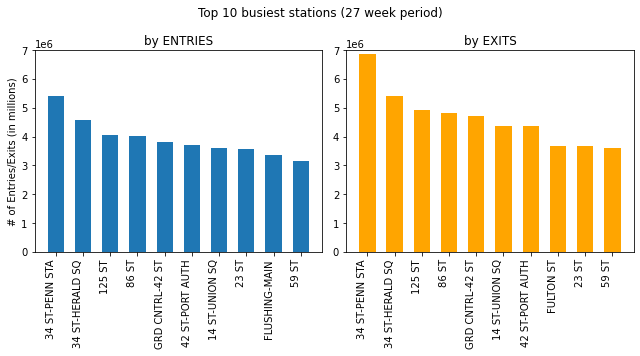

In [74]:
# Bar Graphs of top 10 Stations by Exits and Entries over 27 week period

%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(9, 5))
axs[0].bar(x=station_total_entries['STATION'][:10], height=station_total_entries['TOTAL_ENTRIES'][:10], width = 0.6, label="Daily Entries") # ranked by Entries and showing entries
axs[1].bar(x=station_total_exits['STATION'][:10],
        height=station_total_exits['TOTAL_EXITS'][:10], width = 0.6, label="Daily Exits", color='orange') # ranked by Exits and showing exits

axs[0].set_ylim(0, 7000000)
axs[1].set_ylim(0, 7000000)

plt.draw()
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, ha='right')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, ha='right')
axs[0].set_title('by ENTRIES')
axs[1].set_title('by EXITS')
fig.suptitle('Top 10 busiest stations (27 week period)')
axs[0].set_ylabel('# of Entries/Exits (in millions)')
fig.tight_layout()
# plt.show()
plt.savefig('img/top_10.png')

## Plot daily entries and exits for Penn Station (busiest by exits and entries)

In [54]:
penn_daily = station_daily[station_daily["STATION"] == "34 ST-PENN STA"].copy() # copy not necessary because, it’s not manipulating the original df
penn_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
11453,34 ST-PENN STA,2020-07-26,13054.0,16710.0
11454,34 ST-PENN STA,2020-07-27,26442.0,30893.0
11455,34 ST-PENN STA,2020-07-28,27122.0,32419.0
11456,34 ST-PENN STA,2020-07-29,27302.0,33369.0
11457,34 ST-PENN STA,2020-07-30,26820.0,32901.0
...,...,...,...,...
11636,34 ST-PENN STA,2021-01-25,30376.0,38752.0
11637,34 ST-PENN STA,2021-01-26,29589.0,38056.0
11638,34 ST-PENN STA,2021-01-27,30543.0,39838.0
11639,34 ST-PENN STA,2021-01-28,31014.0,41012.0


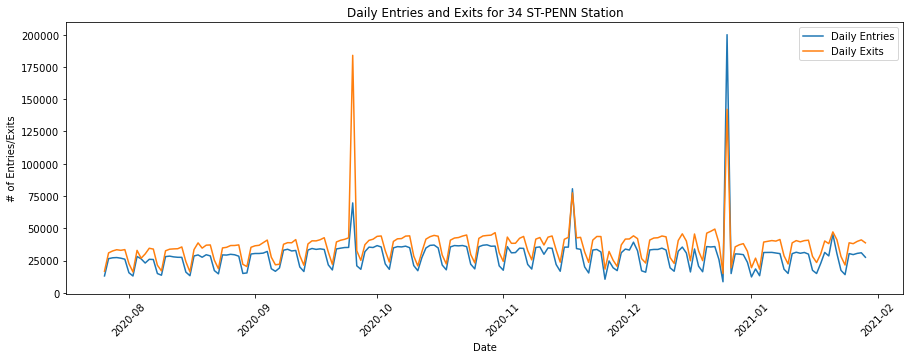

In [75]:
plt.figure(figsize=(15,5))
plt.plot(penn_daily['DATE'], penn_daily['DAILY_ENTRIES'], label="Daily Entries")
plt.plot(penn_daily['DATE'], penn_daily['DAILY_EXITS'], label="Daily Exits")
plt.legend(loc="upper right")
plt.ylabel('# of Entries/Exits')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries and Exits for 34 ST-PENN Station')
plt.savefig('img/penn_daily01.png')
# ???? Thanksgiving and Christmas makes sense... What's with the rest?

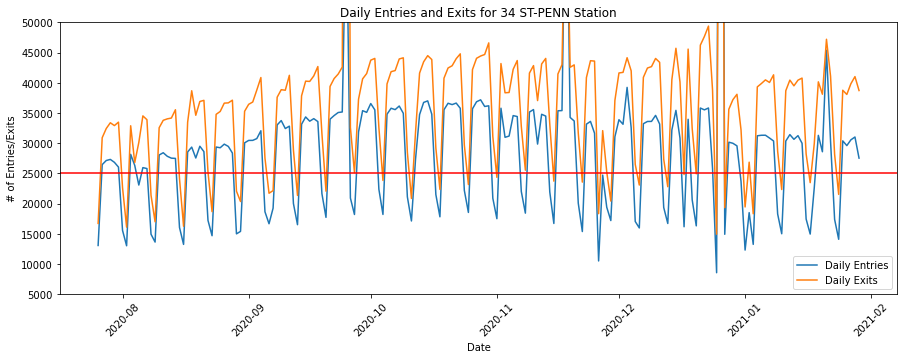

In [76]:
plt.figure(figsize=(15,5))
plt.plot(penn_daily['DATE'], penn_daily['DAILY_ENTRIES'], label="Daily Entries")
plt.plot(penn_daily['DATE'], penn_daily['DAILY_EXITS'], label="Daily Exits")
plt.axhline(y=25000, color='r', linestyle='-')
plt.legend(loc="lower right")
plt.ylabel('# of Entries/Exits')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries and Exits for 34 ST-PENN Station')

plt.ylim(5000, 50000)

plt.savefig('img/penn_daily02.png')

??? 

Public holidays celebrated in NY include:

Labor Day Mon, Sep 7, 2020
Columbus Day Mon, Oct 12, 2020
Veterans Day Wed, Nov 11, 2020
Thanksgiving Thu, Nov 26, 2020
Christmas Day Fri, Dec 25, 2020
New Year's Day Fri, Jan 1, 2021
Martin Luther King Jr. Day Mon, Jan 18, 2021

In [57]:
print(penn_daily.sort_values("DAILY_ENTRIES", ascending=False).head(15))
print(penn_daily.sort_values("DAILY_ENTRIES", ascending=False).tail(10))

              STATION       DATE  DAILY_ENTRIES  DAILY_EXITS
11606  34 ST-PENN STA 2020-12-26       200026.0     142202.0
11568  34 ST-PENN STA 2020-11-18        80617.0      77423.0
11514  34 ST-PENN STA 2020-09-25        69646.0     184019.0
11632  34 ST-PENN STA 2021-01-21        45379.0      47194.0
11583  34 ST-PENN STA 2020-12-03        39225.0      44139.0
11547  34 ST-PENN STA 2020-10-28        37170.0      44419.0
11534  34 ST-PENN STA 2020-10-15        36994.0      44482.0
11546  34 ST-PENN STA 2020-10-27        36843.0      44042.0
11533  34 ST-PENN STA 2020-10-14        36737.0      43464.0
11541  34 ST-PENN STA 2020-10-22        36627.0      43975.0
11539  34 ST-PENN STA 2020-10-20        36598.0      42436.0
11520  34 ST-PENN STA 2020-10-01        36553.0      43734.0
11540  34 ST-PENN STA 2020-10-21        36379.0      42810.0
11549  34 ST-PENN STA 2020-10-30        36179.0      46593.0
11527  34 ST-PENN STA 2020-10-08        36141.0      43934.0
              STATION   

In [58]:
# sorted by Entries
penn_daily[['DATE','DAILY_ENTRIES','DAILY_EXITS']].sort_values("DAILY_ENTRIES", ascending=False)

,DATE,DAILY_ENTRIES,DAILY_EXITS
11606,2020-12-26,200026.0,142202.0
11568,2020-11-18,80617.0,77423.0
11514,2020-09-25,69646.0,184019.0
11632,2021-01-21,45379.0,47194.0
11583,2020-12-03,39225.0,44139.0
...,...,...,...
11453,2020-07-26,13054.0,16710.0
11460,2020-08-02,13005.0,16089.0
11612,2021-01-01,12293.0,19432.0
11576,2020-11-26,10493.0,18319.0


In [59]:
# sorted by Entries
penn_daily[['DATE','DAILY_ENTRIES','DAILY_EXITS']].sort_values("DAILY_EXITS", ascending=False)

,DATE,DAILY_ENTRIES,DAILY_EXITS
11514,2020-09-25,69646.0,184019.0
11606,2020-12-26,200026.0,142202.0
11568,2020-11-18,80617.0,77423.0
11603,2020-12-23,35815.0,49376.0
11602,2020-12-22,35507.0,47655.0
...,...,...,...
11467,2020-08-09,13617.0,16978.0
11453,2020-07-26,13054.0,16710.0
11474,2020-08-16,13232.0,16231.0
11460,2020-08-02,13005.0,16089.0


## Weekly Plots

In [60]:
import numpy as np

In [61]:
penn_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(penn_daily['DATE']).dt.dayofweek
# taking the 'DATE' converting into datetime object via 'to_datetime'; then extracting the day of the week using dt.dayofweek; dt. is an attribute within datetime object. .dayofweek, given dt gives day of the week. dt <-- what you use if you do anything with dates; helps you extract the datetime attribute of the series. dt; this is all pandas.
penn_daily['WEEK_OF_YEAR'] = pd.to_datetime(penn_daily['DATE']).dt.week
# .week <-- gives week of the year
penn_daily.head() # 6 is Sunday 0 is Monday

<ipython-input-61-6fb80ca70c49>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  penn_daily['WEEK_OF_YEAR'] = pd.to_datetime(penn_daily['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
11453,34 ST-PENN STA,2020-07-26,13054.0,16710.0,6,30
11454,34 ST-PENN STA,2020-07-27,26442.0,30893.0,0,31
11455,34 ST-PENN STA,2020-07-28,27122.0,32419.0,1,31
11456,34 ST-PENN STA,2020-07-29,27302.0,33369.0,2,31
11457,34 ST-PENN STA,2020-07-30,26820.0,32901.0,3,31


Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STA')

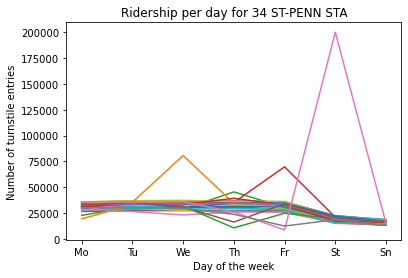

In [62]:
for i, group in penn_daily.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
# just a for loop; grouping of the Week of the year, for every week it is; and for each group plotting, with day of week as x-axis and daily entries as y axis.
    
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn']) # changing x-tick labels np.arange(7) is the index location of the labels, then list for actual labels that we want for the tick mark.
plt.title('Ridership per day for 34 ST-PENN STA')

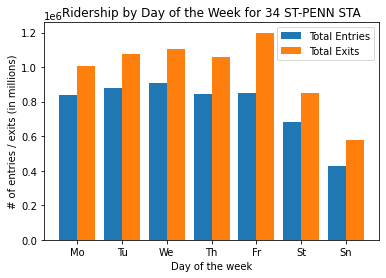

In [73]:
penn_day = penn_daily.groupby('DAY_OF_WEEK_NUM').sum('TOTAL_ENTRIES').reset_index()
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
plt.bar(x=penn_day['DAY_OF_WEEK_NUM'] - 0.2,
        height=penn_day['DAILY_ENTRIES'], width = 0.4, label="Total Entries")
plt.bar(x=penn_day['DAY_OF_WEEK_NUM'] + 0.2,
        height=penn_day['DAILY_EXITS'], width = 0.4, label="Total Exits")
plt.legend(loc='upper right')
plt.xlabel('Day of the week')
plt.ylabel('# of entries / exits (in millions)')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn']) # changing x-tick labels np.arange(7) is the index location of the labels, then list for actual labels that we want for the tick mark.
plt.title('Ridership by Day of the Week for 34 ST-PENN STA')
plt.savefig('img/penn_week_plot.png')